# AutoPipeline

Diffusers provides many pipelines for basic tasks like generating images, videos, audio, and inpainting.     
On top of these, there are specialized pipelines for adapters and features like upscaling, super-resolution, and more.       
Different pipeline classes can even use the same checkpoint because they share the same pretrained model!    
With so many different pipelines, it can be overwhelming to know which pipeline class to use.

The AutoPipeline class is designed to simplify the variety of pipelines in Diffusers.

It is a generic task-first pipeline that lets you focus on a task     
(AutoPipelineForText2Image, AutoPipelineForImage2Image, and AutoPipelineForInpainting) without needing to know the specific pipeline class.
    
The AutoPipeline automatically detects the correct pipeline class to use.

Under the hood, AutoPipeline:

1. Detects a "stable-diffusion" class from the [model_index.json file](https://huggingface.co/dreamlike-art/dreamlike-photoreal-2.0/blob/main/model_index.json).
2. Depending on the task you’re interested in, it loads the     
    * StableDiffusionPipeline,   
    * StableDiffusionImg2ImgPipeline,        
    * or StableDiffusionInpaintPipeline.     
    * Any parameter (strength, num_inference_steps, etc.) you would pass to these specific pipelines can also be passed to the AutoPipeline.

___

In [1]:
!pip install diffusers["torch"] transformers # install transformers
!pip install accelerate
# install diffusers from source
!pip install git+https://github.com/huggingface/diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.0 MB/s eta 0:00:00
  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-4zhyjqh6
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-4zhyjqh6
  Resolved https://github.com/huggingface/diffusers to commit 8cdcdd9e32925200ce5e1cf410fe14a774f3c3a6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.31.0.dev0-py3-none-any.whl size=2723926 sha256=e809d0e1c7d11addb31785793a0a6a17234e5148b79f9dd919b1478a650d8b67
  Stored in directory: /tmp/pip-ephem-wheel-cache-354xdkhv/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.30.2
    Uninstalling diffusers-0.30.2:
      Successfully uninstalled diffusers-

# Unconditional image generation

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/455M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/852 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

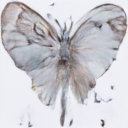

In [2]:
from diffusers import DiffusionPipeline

generator = DiffusionPipeline.from_pretrained("anton-l/ddpm-butterflies-128").to("cuda")
image = generator().images[0]
image

  0%|          | 0/100 [00:00<?, ?it/s]

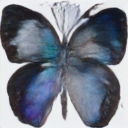

In [3]:
image = generator(num_inference_steps=100).images[0]
image

# Text to Image (T2I)

In [4]:


from diffusers import AutoPipelineForText2Image
import torch

In [ ]:
pipe_txt2img = AutoPipelineForText2Image.from_pretrained(
    "dreamlike-art/dreamlike-photoreal-2.0", torch_dtype=torch.float16, use_safetensors=True
).to("cuda")

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

In [ ]:
prompt = "cinematic photo of Godzilla eating sushi with a cat in a izakaya, 35mm photograph, film, professional, 4k, highly detailed"

In [ ]:
generator = torch.Generator(device="cpu").manual_seed(37) # fix random seed.

In [ ]:
image = pipe_txt2img(prompt, generator=generator).images[0]
image

# Image to Image

In [ ]:
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image
import torch

pipe_img2img = AutoPipelineForImage2Image.from_pretrained(
    "dreamlike-art/dreamlike-photoreal-2.0", torch_dtype=torch.float16, use_safetensors=True
).to("cuda")

init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/autopipeline-text2img.png")

prompt = "cinematic photo of Godzilla eating burgers with a cat in a fast food restaurant, 35mm photograph, film, professional, 4k, highly detailed"
generator = torch.Generator(device="cpu").manual_seed(53) # fix random seed
image = pipe_img2img(prompt, image=init_image, generator=generator).images[0]
image

# Inpainting

In [ ]:
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image
import torch

pipeline = AutoPipelineForInpainting.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True
).to("cuda")

init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/autopipeline-img2img.png")
mask_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/autopipeline-mask.png")

prompt = "cinematic photo of a owl, 35mm photograph, film, professional, 4k, highly detailed"
generator = torch.Generator(device="cpu").manual_seed(38)
image = pipeline(prompt, image=init_image, mask_image=mask_image, generator=generator, strength=0.4).images[0]
image